<a href="https://www.kaggle.com/code/ahmadsoliman94/diabetes-predection-eda?scriptVersionId=96889516" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Diabetes Predection

- let us try to predict, who from patients has diabetes, based on certain diagnostic measurements.

- In this Notebook i will use four models: RandomForest, XGBoost, LGBM and Voting Classifiers. Then let's see which one has best accuracy.

#### Let's import the packages, which i will later use it.

In [62]:
 !pip install mplcyberpunk

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
import seaborn as sns
import xgboost as xgb
import optuna

from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling  import RandomOverSampler
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [64]:
os.chdir('/kaggle/input/pima-indians-diabetes-database/')
!ls

diabetes.csv


In [65]:
# path
df = pd.read_csv('diabetes.csv')
print(f' Shape of Dataset: {df.shape}')

 Shape of Dataset: (768, 9)


- This Dataset contains 768 rows and 9 features.

#### Let's see some values from the dataset. 


In [66]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Now let us do some Exploratory Data Analysis.

- EDA is an approach of analyzing data sets to summarize their main characteristics.

### 1. Descriptive Statistics
- Descriptive Statistics: is a summary statistic that quantitatively describes or summarizes features from a collection of information

In [67]:
df.describe(include='all')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 2. Correlation
- Correlation explains how one or more variables are related to each other.

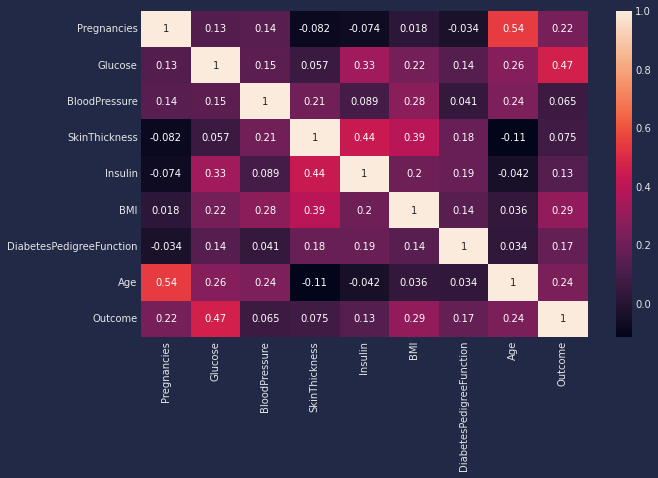

In [68]:
# Using Heatmap to visualize the Correlation.
plt.style.use("cyberpunk")

cor = df.corr()
top_corr_fea = cor.index
plt.figure(figsize=(10,6))
sns.heatmap(df[top_corr_fea].corr(),annot=True)

plt.show()

<Figure size 360x360 with 0 Axes>

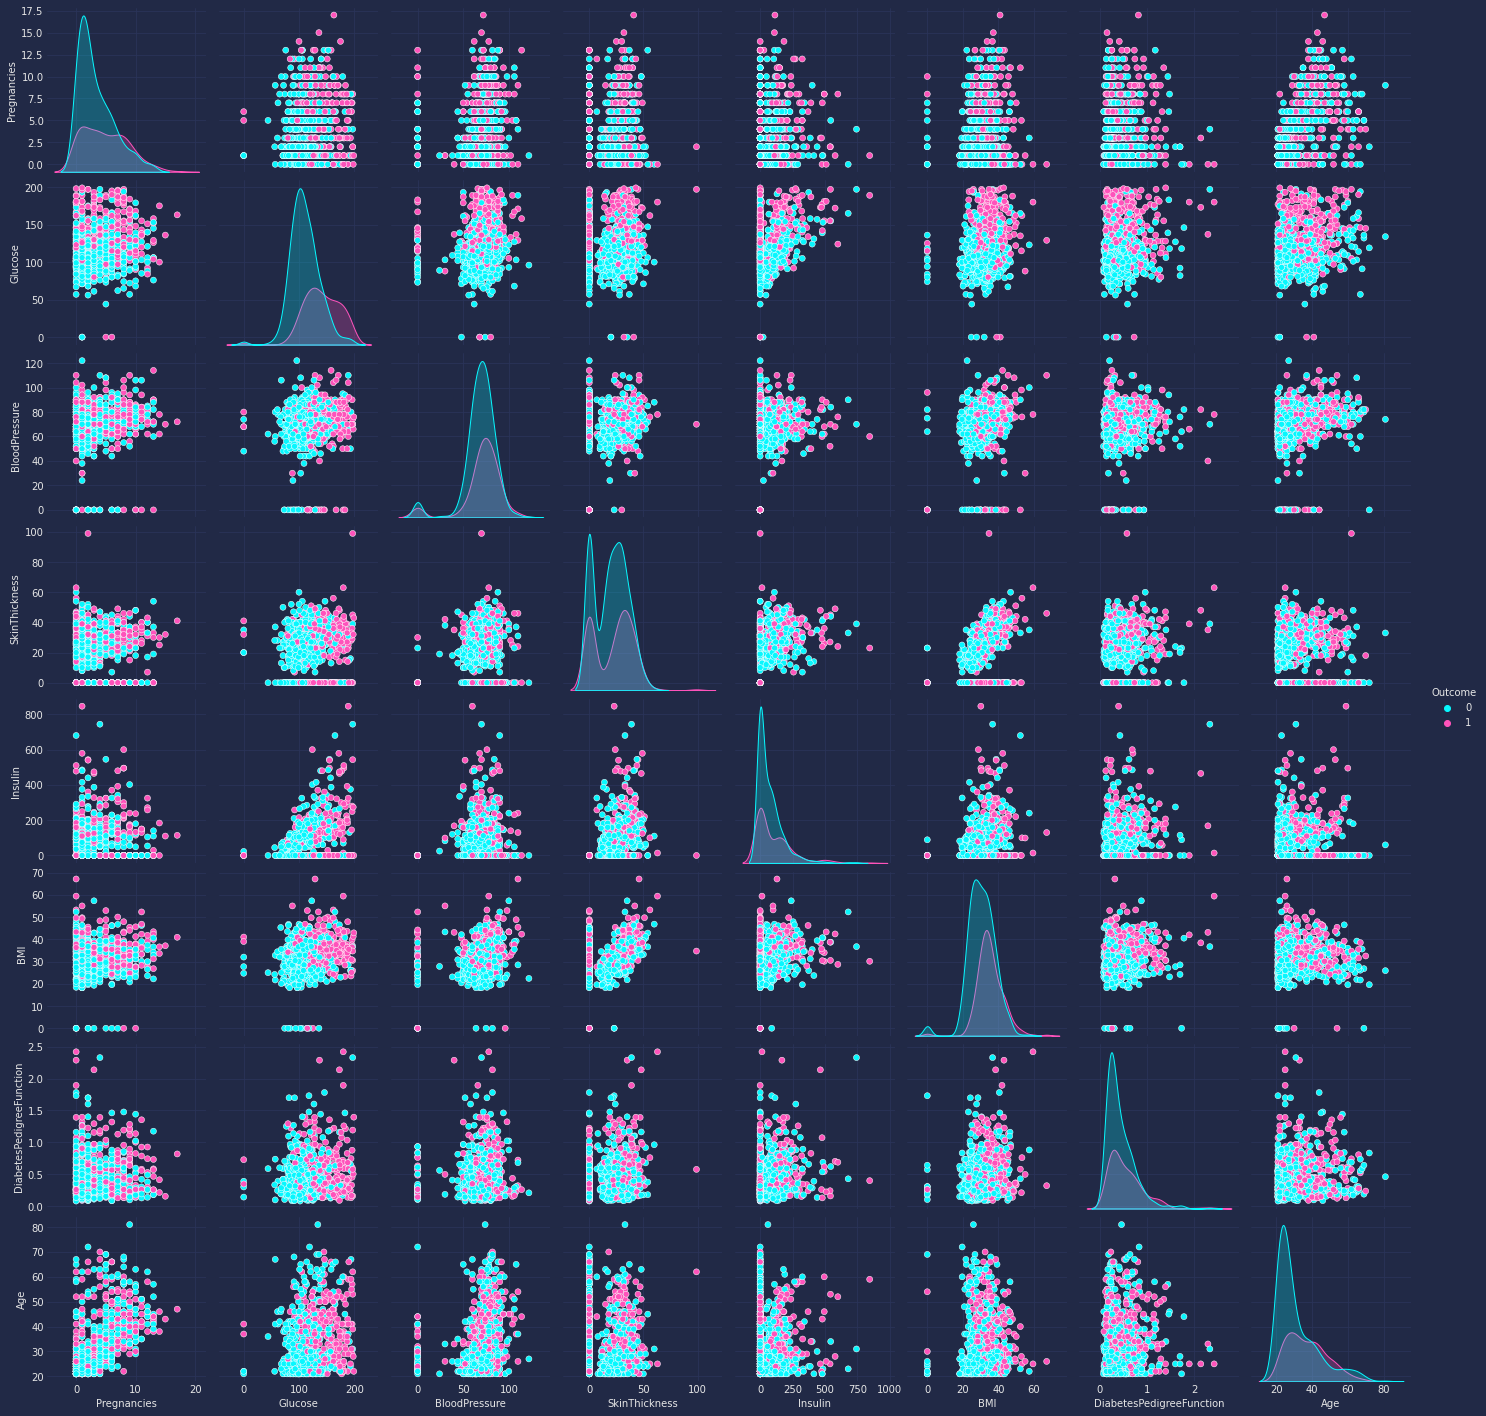

In [69]:
# Using pairplot
plt.style.use("cyberpunk")

plt.figure(figsize=(5,5))
sns.pairplot(df,hue='Outcome')
mplcyberpunk.add_glow_effects()

plt.show()

### 3. Now let us see the Disturbtions for some features. 

In [70]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [71]:
## Outcome
label = ['has not','has diabetes']
data = df['Outcome'].value_counts()

In [72]:
data

0    500
1    268
Name: Outcome, dtype: int64

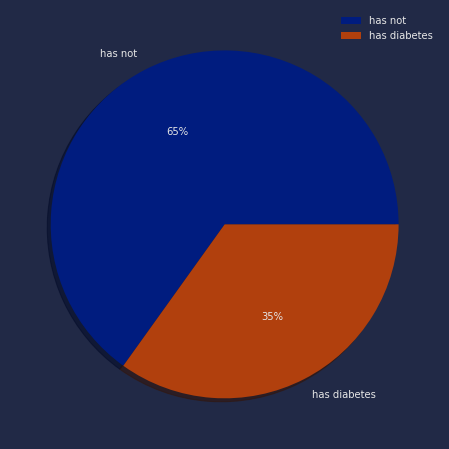

In [73]:
plt.style.use("cyberpunk")
colors = sns.color_palette('dark')
plt.figure(figsize=(8,8))
plt.pie(data,labels=label,colors=colors,autopct='%.0f%%',shadow=True,)
mplcyberpunk.add_underglow()
plt.legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


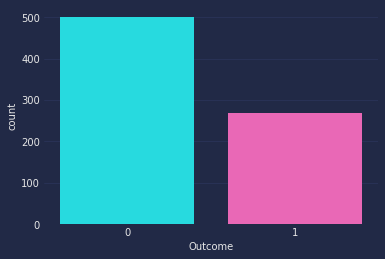

In [74]:
plt.style.use("cyberpunk")
sns.countplot(df['Outcome'])
mplcyberpunk.add_glow_effects()
plt.show()

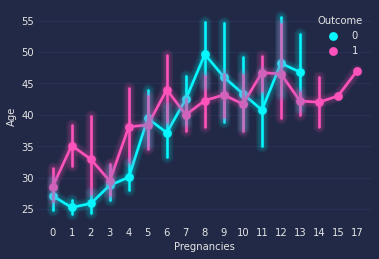

In [75]:
# Age with Pregnancies and Outcome
sns.pointplot(x="Pregnancies",y='Age', hue="Outcome" ,data=df)
mplcyberpunk.make_lines_glow()

<AxesSubplot:xlabel='count', ylabel='Pregnancies'>

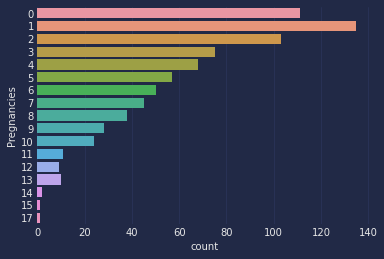

In [76]:
# Pregnancies
sns.countplot(y=df['Pregnancies'])

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

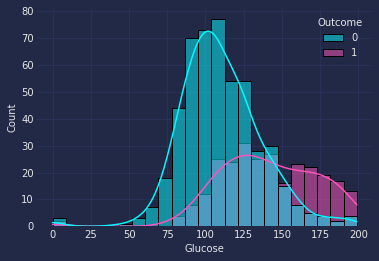

In [77]:
# Glucose with Outcome
sns.histplot(x='Glucose', data=df, kde=True, hue="Outcome")

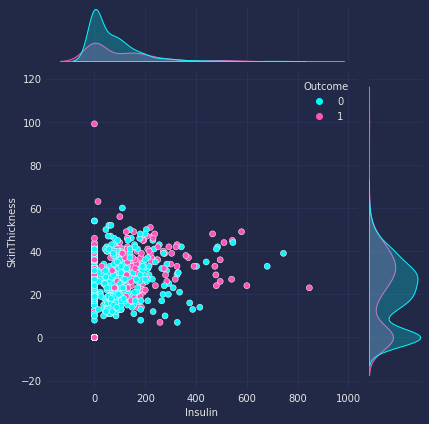

In [78]:
# SkinThickness with Insulin
sns.jointplot(x='Insulin',y='SkinThickness',hue='Outcome',data=df)

### 4. let's Check a Missing Value

In [79]:
print(df.isnull().sum().sort_values(ascending=False))

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


- as we can see the Data is clean.

### Let's examine  the numerical features.


In [80]:
numeric_features = df.select_dtypes(include=[np.number])
print(numeric_features.columns)
print('****************************************************************************')
print(f'There is {numeric_features.shape[1]} numeric features.')

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
****************************************************************************
There is 9 numeric features.


   - In this Data there is no categorical features.

#### Now let's do some Data preprocessing


#### 1. Data Splitting


In [81]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

print(f' Shape of X: {X.shape} \n Shape of y: {y.shape}')

 Shape of X: (768, 8) 
 Shape of y: (768,)


In [82]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

- from above you can notice that the data is imbalanced.
- - to deal with that i will use OverSampling 

In [83]:
rs = RandomOverSampler()
X_resample, y_resample = rs.fit_resample(X,y)

print(f' Shape of X after Oversampling: {X_resample.shape} \n Shape of y after Oversampling: {y_resample.shape}')

 Shape of X after Oversampling: (1000, 8) 
 Shape of y after Oversampling: (1000,)


In [84]:
y_resample.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

### 2. let's scale the Data using Standardization

In [85]:
scl = StandardScaler()
X_rescale = scl.fit_transform(X_resample)

### 3. Data Splitting into train and test

In [86]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_rescale,y_resample,test_size=0.20,shuffle=True,random_state=0)
print(f' Shape of X_train: {X_train_res.shape} & Shape of X_test: {X_test_res.shape}')
print(f' Shape of y_train: {y_train_res.shape} & Shape of y_test: {y_test_res.shape}')

 Shape of X_train: (800, 8) & Shape of X_test: (200, 8)
 Shape of y_train: (800,) & Shape of y_test: (200,)


###  let us now select the models and tune the hyperparameter using optuna then evaluate the Results

#### 1. RandomForest Classifier

In [87]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train_res, y_train_res)
y_pred_test_res = rf_clf.predict(X_test_res)
y_pred_train_res = rf_clf.predict(X_train_res)

In [88]:
print('Accuracy score of Train after Oversampling: {}'.format(accuracy_score(y_train_res,y_pred_train_res)*100))
print('Accuracy score of Test after Oversampling: {}'.format(accuracy_score(y_test_res,y_pred_test_res)*100))

Accuracy score of Train after Oversampling: 100.0
Accuracy score of Test after Oversampling: 88.5


In [89]:
def objective(trial):
    param_grid = dict(
    criterion = trial.suggest_categorical('criterion', ['gini','entropy']),
    bootstrap = trial.suggest_categorical('bootstrap',['True','False']),
    max_depth = trial.suggest_int('max_depth', 1, 10000),
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2']),
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000),
    n_estimators =  trial.suggest_int('n_estimators', 30, 1000)
    
                     )
    
    rf_clf = RandomForestClassifier(**param_grid)
    scores = cross_val_score(rf_clf, X_train_res, y_train_res, cv=5, scoring='accuracy')
    return scores.mean().round(5)

study = optuna.create_study(direction='maximize')


study.optimize(objective, n_trials=10, show_progress_bar=True)

[I 2022-05-29 07:21:30,699] A new study created in memory with name: no-name-de155dd6-acd3-4fe9-b72f-290c7ce967d3
/opt/conda/lib/python3.7/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2022-05-29 07:21:33,839] Trial 0 finished with value: 0.8325 and parameters: {'criterion': 'gini', 'bootstrap': 'True', 'max_depth': 6022, 'max_features': 'auto', 'max_leaf_nodes': 4306, 'n_estimators': 326}. Best is trial 0 with value: 0.8325.
[I 2022-05-29 07:21:39,254] Trial 1 finished with value: 0.8175 and parameters: {'criterion': 'gini', 'bootstrap': 'True', 'max_depth': 824, 'max_features': 'auto', 'max_leaf_nodes': 3844, 'n_estimators': 587}. Best is trial 0 with value: 0.8325.
[I 2022-05-29 07:21:46,277] Trial 2 finished with value: 0.825 and parameters: {'criterion': 'entropy', 'bootstrap': 'False', 'max_depth': 506, 'max_features': 'log2', 'max_leaf_nodes': 654, 'n_estimators': 642}. Best is trial 0 with value: 0.8325.
[I 2022-05-29 07:21:51,400] Trial 3 finished with value: 0.825 and parameters: {'criterion': 'entropy', 'bootstrap': 'False', 'max_depth': 2466, 'max_features': 'sqrt', 'max_leaf_nodes': 3127, 'n_estimators': 516}. Best is trial 0 with value: 0.8325.
[I 20

In [90]:
best_params_rf = study.best_trial.params
print('Best parameters:', best_params_rf)
print('Best score: {:.2f}%'.format(study.best_value*100))

Best parameters: {'criterion': 'gini', 'bootstrap': 'True', 'max_depth': 6022, 'max_features': 'auto', 'max_leaf_nodes': 4306, 'n_estimators': 326}
Best score: 83.25%


In [91]:
rf_clf = RandomForestClassifier(**best_params_rf).fit(X_train_res,y_train_res)
y_pred_rf = rf_clf.predict(X_test_res)

In [92]:
print('Accuracy score of Test: ', accuracy_score(y_test_res, y_pred_rf)*100,'%')

Accuracy score of Test:  89.5 %


In [93]:
print(confusion_matrix(y_test_res, y_pred_rf))

[[89 16]
 [ 5 90]]


In [94]:
unique, counts = np.unique(y_pred_rf, return_counts=True)

print (np.asarray((unique, counts)))

[[  0   1]
 [ 94 106]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


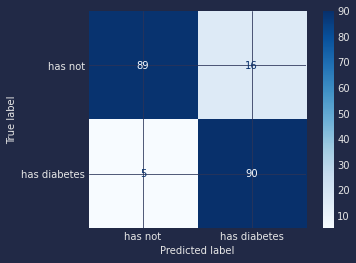

In [95]:
disp = plot_confusion_matrix(rf_clf, X_test_res, y_test_res,
                              display_labels=['has not', 'has diabetes'],
                              cmap=plt.cm.Blues)

In [96]:
print(classification_report(y_test_res, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.85      0.89       105
           1       0.85      0.95      0.90        95

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



### 2. XGBoost Classifier

In [97]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 0, 700)
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 20)
    learning_rate = trial.suggest_discrete_uniform('learning_rate', 0.01, 0.1, 0.01)
    subsample = trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1)
    colsample_bytree = trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1)

    xgboost_clf = xgb.XGBClassifier(

        objective = 'binary:logitraw',
        eval_metric = 'auc',
        random_state=42, 
        n_estimators = n_estimators,
        max_depth = max_depth,
        min_child_weight = min_child_weight,
        subsample = subsample,
        learning_rate=learning_rate,
        colsample_bytree = colsample_bytree
    )

    scores = cross_val_score(xgboost_clf, X_train_res, y_train_res, cv=5, scoring='accuracy')
    return scores.mean().round(5)

study = optuna.create_study(direction='maximize')


study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2022-05-29 07:22:22,717] A new study created in memory with name: no-name-987efe1e-389a-4fc9-8dcd-d0e52726cd0f
/opt/conda/lib/python3.7/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2022-05-29 07:22:36,241] Trial 0 finished with value: 0.72 and parameters: {'n_estimators': 694, 'max_depth': 4, 'min_child_weight': 16, 'learning_rate': 0.02, 'subsample': 0.8, 'colsample_bytree': 0.8}. Best is trial 0 with value: 0.72.
[I 2022-05-29 07:22:43,778] Trial 1 finished with value: 0.7375 and parameters: {'n_estimators': 338, 'max_depth': 14, 'min_child_weight': 13, 'learning_rate': 0.060000000000000005, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 1 with value: 0.7375.
[I 2022-05-29 07:22:46,143] Trial 2 finished with value: 0.71875 and parameters: {'n_estimators': 116, 'max_depth': 7, 'min_child_weight': 14, 'learning_rate': 0.060000000000000005, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 1 with value: 0.7375.
[I 2022-05-29 07:22:58,467] Trial 3 finished with value: 0.7375 and parameters: {'n_estimators': 666, 'max_depth': 18, 'min_child_weight': 19, 'learning_rate': 0.09, 'subsample': 0.6, 'colsample_bytree': 0.7}. Best is trial 1 with valu

In [98]:
best_params_xgb = study.best_trial.params
print('Best parameters:', best_params_xgb)
print('Best score: {:.2f}%'.format(study.best_value*100))

Best parameters: {'n_estimators': 202, 'max_depth': 12, 'min_child_weight': 1, 'learning_rate': 0.03, 'subsample': 0.6, 'colsample_bytree': 0.6}
Best score: 81.38%


In [99]:
xgb_clf = xgb.XGBClassifier(**best_params_xgb).fit(X_train_res,y_train_res)
y_pred_xgb = xgb_clf.predict(X_test_res)

In [100]:
print('Accuracy score of Test: ', accuracy_score(y_test_res, y_pred_xgb)*100,'%')

Accuracy score of Test:  87.0 %


In [101]:
print(classification_report(y_test_res, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       105
           1       0.82      0.94      0.87        95

    accuracy                           0.87       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200



### 3. LGBM Classifier

In [102]:
def objective(trial):
    param_grid = dict(n_estimators=trial.suggest_int('n_estimators', 20, 1000, 10), 
                      learning_rate=trial.suggest_float('learning_rate', 0, 1), 
                      max_depth=trial.suggest_int('max_depth', 3, 12))
    clf = LGBMClassifier(**param_grid)
    scores = cross_val_score(clf, X_train_res, y_train_res, cv=5, scoring='accuracy')
    return scores.mean().round(5)

study = optuna.create_study(direction='maximize')


study.optimize(objective, n_trials=10, show_progress_bar=True)

[I 2022-05-29 07:24:40,096] A new study created in memory with name: no-name-a18e26f5-2e87-47e5-9b02-5e0d2446edd2
/opt/conda/lib/python3.7/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2022-05-29 07:24:41,367] Trial 0 finished with value: 0.81125 and parameters: {'n_estimators': 990, 'learning_rate': 0.6180678733367216, 'max_depth': 11}. Best is trial 0 with value: 0.81125.
[I 2022-05-29 07:24:41,580] Trial 1 finished with value: 0.78875 and parameters: {'n_estimators': 140, 'learning_rate': 0.6502476899860326, 'max_depth': 3}. Best is trial 0 with value: 0.81125.
[I 2022-05-29 07:24:42,203] Trial 2 finished with value: 0.80625 and parameters: {'n_estimators': 480, 'learning_rate': 0.7192517579361393, 'max_depth': 3}. Best is trial 0 with value: 0.81125.
[I 2022-05-29 07:24:43,183] Trial 3 finished with value: 0.81875 and parameters: {'n_estimators': 560, 'learning_rate': 0.27482893915787465, 'max_depth': 4}. Best is trial 3 with value: 0.81875.
[I 2022-05-29 07:24:45,255] Trial 4 finished with value: 0.80875 and parameters: {'n_estimators': 700, 'learning_rate': 0.15388601757992482, 'max_depth': 9}. Best is trial 3 with value: 0.81875.
[I 2022-05-29 07:24:46,299]

In [103]:
best_params_lgb = study.best_trial.params
print('Best parameters:', best_params_lgb)
print('Best score: {:.2f}%'.format(study.best_value*100))

Best parameters: {'n_estimators': 560, 'learning_rate': 0.27482893915787465, 'max_depth': 4}
Best score: 81.88%


In [104]:
lgb_clf = LGBMClassifier(**best_params_lgb).fit(X_train_res,y_train_res)
y_pred_lgb = lgb_clf.predict(X_test_res)

In [105]:
print('Accuracy score of Test: ', accuracy_score(y_test_res, y_pred_lgb)*100,'%')


Accuracy score of Test:  85.5 %


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


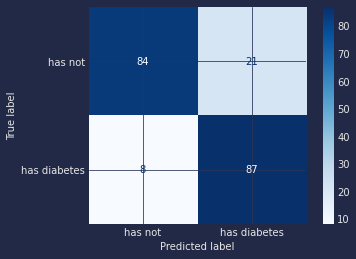

In [106]:
disp = plot_confusion_matrix(lgb_clf, X_test_res, y_test_res,
                              display_labels=['has not', 'has diabetes'],
                              cmap=plt.cm.Blues)

In [107]:
print(classification_report(y_test_res, y_pred_lgb))


              precision    recall  f1-score   support

           0       0.91      0.80      0.85       105
           1       0.81      0.92      0.86        95

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.85       200



#### 4. VotingClassifier 

In [108]:
voting_clf = VotingClassifier([('rf',rf_clf),('xgb',xgb_clf),('lgb',lgb_clf)],verbose=True)
voting_clf.fit(X_train_res,y_train_res)
voting_clf_results = cross_val_score(estimator = voting_clf, X = X_train_res, y = y_train_res, cv = 5)
voting_clf_pred = voting_clf.predict(X_test_res)

[Voting] ....................... (1 of 3) Processing rf, total=   0.7s
[Voting] ...................... (2 of 3) Processing xgb, total=   1.3s
[Voting] ...................... (3 of 3) Processing lgb, total=   0.2s
[Voting] ....................... (1 of 3) Processing rf, total=   0.6s
[Voting] ...................... (2 of 3) Processing xgb, total=   1.0s
[Voting] ...................... (3 of 3) Processing lgb, total=   0.2s
[Voting] ....................... (1 of 3) Processing rf, total=   0.6s
[Voting] ...................... (2 of 3) Processing xgb, total=   1.0s
[Voting] ...................... (3 of 3) Processing lgb, total=   0.2s
[Voting] ....................... (1 of 3) Processing rf, total=   0.6s
[Voting] ...................... (2 of 3) Processing xgb, total=   1.0s
[Voting] ...................... (3 of 3) Processing lgb, total=   0.2s
[Voting] ....................... (1 of 3) Processing rf, total=   0.6s
[Voting] ...................... (2 of 3) Processing xgb, total=   1.0s
[Votin

In [109]:
print('Accuracy score of Test: {}'.format(accuracy_score(y_test_res,voting_clf_pred)*100),'%')

Accuracy score of Test: 88.5 %


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


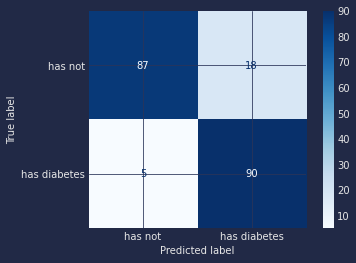

In [110]:
disp = plot_confusion_matrix(voting_clf, X_test_res, y_test_res,
                              display_labels=['has not', 'has diabetes'],
                              cmap=plt.cm.Blues)

In [111]:
print(classification_report(y_test_res, voting_clf_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88       105
           1       0.83      0.95      0.89        95

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



In [112]:
rf = accuracy_score(y_test_res,y_pred_rf)*100
xgb = accuracy_score(y_test_res,y_pred_xgb)*100
lgb = accuracy_score(y_test_res,y_pred_lgb)*100
voting = accuracy_score(y_test_res,voting_clf_pred)*100

scores = [rf,xgb,lgb,voting]
labels = ['Random Forest Classifier', 'XGB Classifier','LGB Classifier', 'Voting Classifier']
accs = {'Accuracy': scores}
df = pd.DataFrame(accs,index=labels)
df

,Accuracy
Random Forest Classifier,89.5
XGB Classifier,87.0
LGB Classifier,85.5
Voting Classifier,88.5


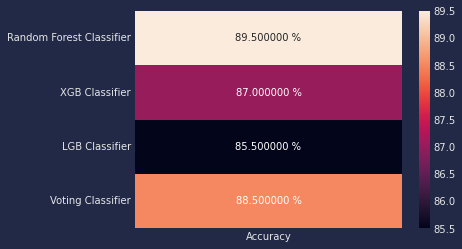

In [113]:
ax = sns.heatmap(df,annot=True,fmt="1f")
for t in ax.texts: t.set_text(t.get_text() + " %")

- RF Classifier has the best Accuracy